In [60]:
#for data analysis
import numpy as np
from numpy import array
from numpy import argmax
import pandas as pd


#for visualistions
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_style("darkgrid")
sns.set_palette(palette='Paired')

#for data preprocessing and preperation 
from collections import Counter
import imblearn
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#for defining models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#for model evaluation
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report


#to ignore warnings 
import warnings
warnings.filterwarnings('ignore')

In [61]:
data = pd.read_csv("/Users/pratikkumarintoliya/Desktop/healthcare-dataset-stroke-data copy.csv",delimiter=",")

In [62]:
df=data.copy()

In [63]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)

In [64]:
df

id  gender    age  hypertension  heart_disease ever_married  \
0      9046    Male  67.00             0              1          Yes   
1     51676  Female  61.00             0              0          Yes   
2     31112    Male  80.00             0              1          Yes   
3     60182  Female  49.00             0              0          Yes   
4      1665  Female  79.00             1              0          Yes   
5     56669    Male  81.00             0              0          Yes   
6     53882    Male  74.00             1              1          Yes   
7     10434  Female  69.00             0              0           No   
8     27419  Female  59.00             0              0          Yes   
9     60491  Female  78.00             0              0          Yes   
10    12109  Female  81.00             1              0          Yes   
11    12095  Female  61.00             0              1          Yes   
12    12175  Female  54.00             0              0          Yes   
13     8213    Male  78.00             0              1          Yes   
14     5317  Female  79.00             0              1          Yes   
15    58202  Female  50.00             1              0          Yes   
16    56112    Male  64.00             0              1          Yes   
17    34120    Male  75.00             1              0          Yes   
18    27458  Female  60.00             0              0           No   
19    25226    Male  57.00             0              1           No   
20    70630  Female  71.00             0              0          Yes   
21    13861  Female  52.00             1              0          Yes   
22    68794  Female  79.00             0              0          Yes   
23    64778    Male  82.00             0              1          Yes   
24     4219    Male  71.00             0              0          Yes   
25    70822    Male  80.00             0              0          Yes   
26    38047  Female  65.00             0              0          Yes   
27    61843    Male  58.00             0              0          Yes   
28    54827    Male  69.00             0              1          Yes   
29    69160    Male  59.00             0              0          Yes   
30    43717    Male  57.00             1              0          Yes   
31    33879    Male  42.00             0              0          Yes   
32    39373  Female  82.00             1              0          Yes   
33    54401    Male  80.00             0              1          Yes   
34    14248    Male  48.00             0              0           No   
35      712  Female  82.00             1              1           No   
36    47269    Male  74.00             0              0          Yes   
37    24977  Female  72.00             1              0          Yes   
38    47306    Male  58.00             0              0           No   
39    62602  Female  49.00             0              0          Yes   
40     4651    Male  78.00             0              0          Yes   
41     1261    Male  54.00             0              0          Yes   
42    61960    Male  82.00             0              1          Yes   
43     1845  Female  63.00             0              0          Yes   
44     7937    Male  60.00             1              0          Yes   
45    19824    Male  76.00             1              0          Yes   
46    37937  Female  75.00             0              1           No   
47    47472  Female  58.00             0              0          Yes   
48    35626    Male  81.00             0              0          Yes   
49    36338  Female  39.00             1              0          Yes   
50    18587  Female  76.00             0              0           No   
51    15102    Male  78.00             1              0          Yes   
52    59190  Female  79.00             0              1          Yes   
53    47167  Female  77.00             1              0          Yes   
54     8752  Female  63.00             0         

In [65]:
fig_num=0

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

EDA

In [66]:
df.head() 

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [67]:
df.drop('id',inplace=True,axis=1)

In [68]:
#examin which variables are categorical and what their data type is
df.info() #df information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [152]:
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [153]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [69]:
#find unique values of categorical columns
for col in (df.select_dtypes(exclude=['float'])).columns:
    print(f"Categories of the '{col}' column: {df[col].unique()}")

Categories of the 'gender' column: ['Male' 'Female' 'Other']
Categories of the 'hypertension' column: [0 1]
Categories of the 'heart_disease' column: [1 0]
Categories of the 'ever_married' column: ['Yes' 'No']
Categories of the 'work_type' column: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Categories of the 'Residence_type' column: ['Urban' 'Rural']
Categories of the 'smoking_status' column: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
Categories of the 'stroke' column: [1 0]


In [70]:
#create data dictionary including variable name and data types
data_dict = pd.DataFrame({'Variable': df.columns, 'Data Type': [df[col].dtype for col in df.columns]})

#write variable descriptions
data_dict['Description'] = [
    'Gender of patient\nFemale, Male', 
    'Age of patient (years)', 
    '0 = does not have hypertention\n1 = has hypertension',
    '0 = does not have hear disease\n1 = has heart disease',
    'Marriage History\nYes(been or is married)\nNo(never married)',
    'Type of Work-\nPrivate: work for private firm\nSelf-employed\nGovt_job: work for government\nchildren: is a child (no work)',
    'Type of Residence Area\nUrban, Rural',
    'Average Glucose Level of patient (mg/dL)',
    'Body Mass Index',
    'Smoking Status of patient\nSmokes, Unknown, Former Smoker, Never Smoked',
    'Stroke History\n0 = has not had a stroke\n1 = has had a stroke'
]

#increase column width so that all texts show
data_dict = data_dict.style.set_properties(subset=['Description'], **{'width': '600px'}) 
data_dict #display dataframe

In [71]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [72]:
num_cols = df.select_dtypes(include ='float').keys()
num_cols

Index(['age', 'avg_glucose_level', 'bmi'], dtype='object')

In [73]:
cat_cols_object = df.select_dtypes(include ='object' or 'int64').keys()
cat_cols_object

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [74]:
cat_cols_binary = df.select_dtypes(include = 'int64').keys()
cat_cols_binary

Index(['hypertension', 'heart_disease', 'stroke'], dtype='object')

In [75]:
#make list of all categorical columns
cat_variables = cat_cols_object.append(cat_cols_binary)
cat_variables

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status', 'hypertension', 'heart_disease', 'stroke'],
      dtype='object')

In [76]:
df.describe()

age  hypertension  heart_disease  avg_glucose_level  \
count  5110.000000   5110.000000    5110.000000        5110.000000   
mean     43.226614      0.097456       0.054012         106.147677   
std      22.612647      0.296607       0.226063          45.283560   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.245000   
50%      45.000000      0.000000       0.000000          91.885000   
75%      61.000000      0.000000       0.000000         114.090000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  
count  4909.000000  5110.000000  
mean     28.893237     0.048728  
std       7.854067     0.215320  
min      10.300000     0.000000  
25%      23.500000     0.000000  
50%      28.100000     0.000000  
75%      33.100000     0.000000  
max      97.600000     1.000000

In [77]:
len(df[(df['age'] <= 15)])

744

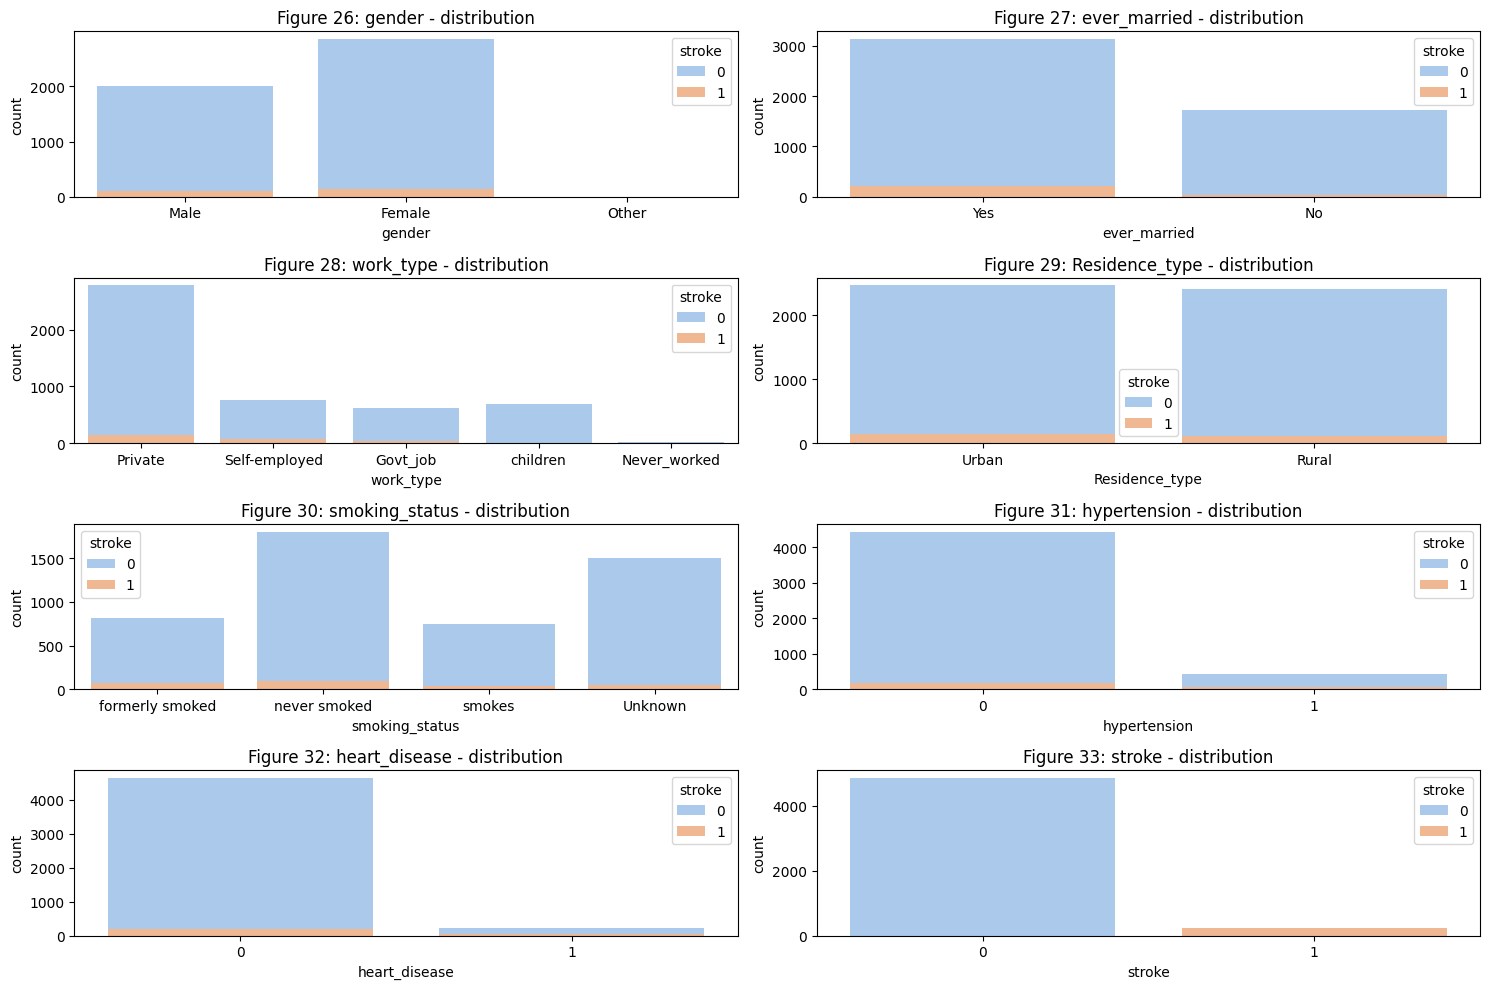

In [162]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 10))  # Define subplot parameters
axes = axes.flatten()  # Flatten the axes array to make iteration easier

sns.set_palette("pastel")  # Change color palette

# Iterate over each categorical column and create a subplot
for i, col in enumerate(df[cat_variables]):
    sns.countplot(x=col, hue='stroke', data=df, ax=axes[i], dodge=False)
    axes[i].set_title(f"Figure {fig_num + i}: {col} - distribution")  # Update figure number

plt.tight_layout()  # Fix layout
plt.show()  # Display subplots


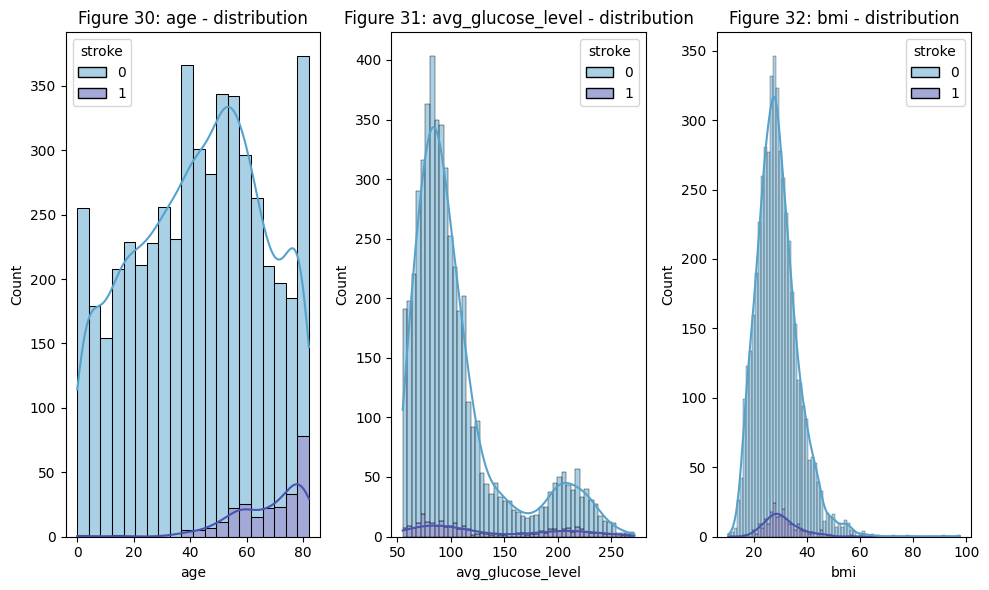

In [164]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 6)) #define subplot parameters
axes = axes.flatten() #flatten the axes array to make it easier to iterate over
sns.set_palette('icefire') #set colour palette


#iterate over each numerical column of the dataframe, creating a subplot
for i, col in enumerate(df[num_cols]):
    sns.histplot(x=col, hue='stroke', data=df, ax=axes[i], kde=True, multiple='stack')
    axes[i].set_title(col)
    fig_num +=1
    axes[i].set_title(f"Figure {fig_num}: {col} - distribution")

plt.tight_layout() #fix layout
plt.show() #display subplots

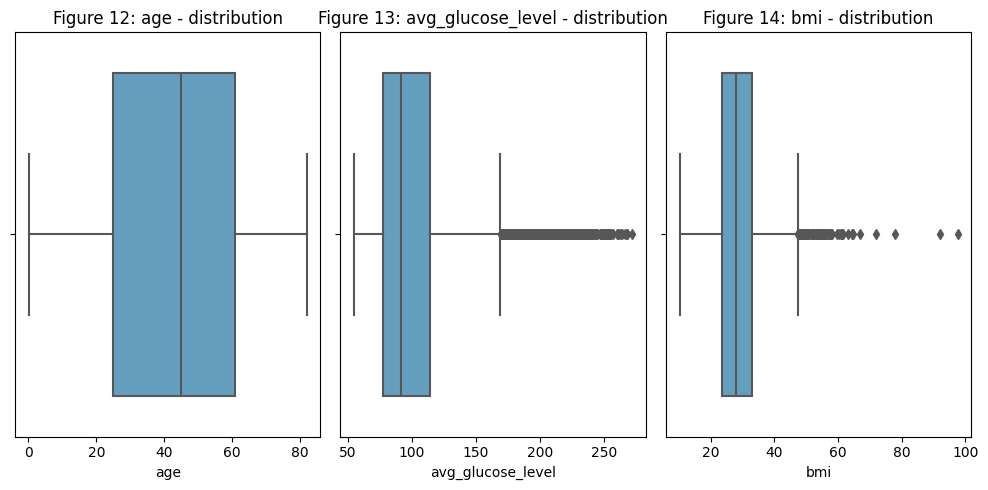

In [80]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5)) #define subplot parameters
axes = axes.flatten() #flatten the axes array to make it easier to iterate over
sns.set_palette('icefire') #set colour palette


#iterate over each numerical column of the dataframe, creating a subplot
for i, col in enumerate(df[num_cols]):
    sns.boxplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(col)
    fig_num +=1
    axes[i].set_title(f"Figure {fig_num}: {col} - distribution")

plt.tight_layout() #fix layout
plt.show() #display subplots

DATA PREPROCESSING

In [81]:
#create OneHotEncoder instance with sparse=False
onehot_encoder = OneHotEncoder(sparse_output=False)  

#fit and transform the categorical columns using OneHotEncoder
df_encoded = pd.DataFrame(
    onehot_encoder.fit_transform(df[cat_cols_object]), 
    columns = onehot_encoder.get_feature_names_out(cat_cols_object)
)

# Concatenate the one hot encoded columns with the original dataframe
df_encoded = pd.concat(
    [df.drop(columns = cat_cols_object), df_encoded], 
    axis = 1
)

df_encoded.head() #display first five rows of new dataframe 

age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
0  67.0             0              1             228.69  36.6       1   
1  61.0             0              0             202.21   NaN       1   
2  80.0             0              1             105.92  32.5       1   
3  49.0             0              0             171.23  34.4       1   
4  79.0             1              0             174.12  24.0       1   

   gender_Female  gender_Male  gender_Other  ever_married_No  \
0            0.0          1.0           0.0              0.0   
1            1.0          0.0           0.0              0.0   
2            0.0          1.0           0.0              0.0   
3            1.0          0.0           0.0              0.0   
4            1.0          0.0           0.0              0.0   

   ever_married_Yes  work_type_Govt_job  work_type_Never_worked  \
0               1.0                 0.0                     0.0   
1               1.0                 0.0                     0.0   
2               1.0                 0.0                     0.0   
3               1.0                 0.0                     0.0   
4               1.0                 0.0                     0.0   

   work_type_Private  work_type_Self-employed  work_type_children  \
0                1.0                      0.0                 0.0   
1                0.0                      1.0                 0.0   
2                1.0                      0.0                 0.0   
3                1.0                      0.0                 0.0   
4                0.0                      1.0                 0.0   

   Residence_type_Rural  Residence_type_Urban  smoking_status_Unknown  \
0                   0.0                   1.0                     0.0   
1                   1.0                   0.0                     0.0   
2                   1.0                   0.0                     0.0   
3                   0.0                   1.0                     0.0   
4                   1.0                   0.0                     0.0   

   smoking_status_formerly smoked  smoking_status_never smoked  \
0                             1.0                          0.0   
1                             0.0                          1.0   
2                             0.0                          1.0   
3                             0.0                          0.0   
4                             0.0                          1.0   

   smoking_status_smokes  
0                    0.0  
1                    0.0  
2                    0.0  
3                    1.0  
4                    0.0

In [82]:
df_encoded.shape #df shape after applied changes

(5110, 22)

In [83]:
df_encoded.corr().style.background_gradient(cmap='coolwarm') #correlation of all variables 

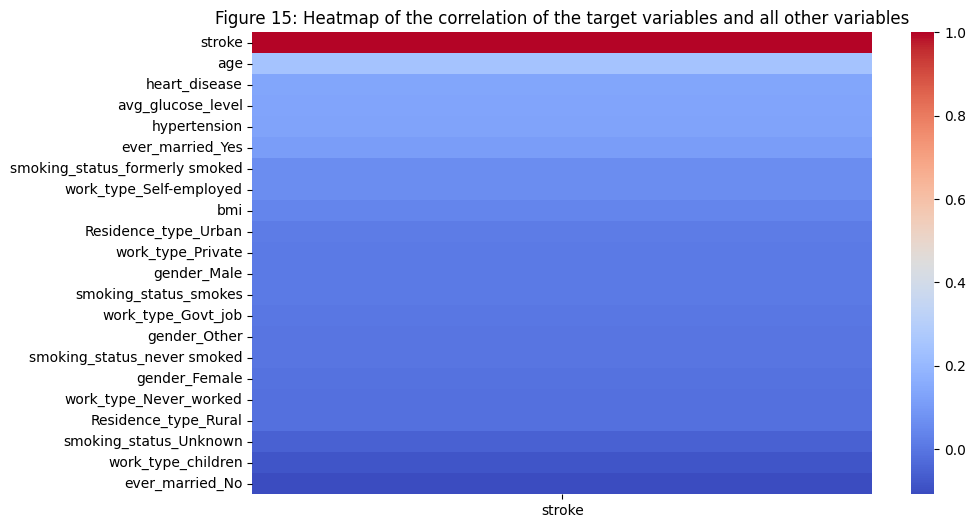

In [84]:
#heat map of correlations of numerical variables with target variable
plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr()[['stroke']].sort_values(by='stroke', ascending=False), cmap='coolwarm') 
fig_num +=1
plt.title(f"Figure {fig_num}: Heatmap of the correlation of the target variables and all other variables")
plt.show()

In [85]:
#correlations of variables with target variable 
df_encoded.corr()[['stroke']].sort_values(by='stroke', ascending=False)

stroke
stroke                          1.000000
age                             0.245257
heart_disease                   0.134914
avg_glucose_level               0.131945
hypertension                    0.127904
ever_married_Yes                0.108340
smoking_status_formerly smoked  0.064556
work_type_Self-employed         0.062168
bmi                             0.042374
Residence_type_Urban            0.015458
work_type_Private               0.011888
gender_Male                     0.009117
smoking_status_smokes           0.008939
work_type_Govt_job              0.002677
gender_Other                   -0.003166
smoking_status_never smoked    -0.004129
gender_Female                  -0.009027
work_type_Never_worked         -0.014882
Residence_type_Rural           -0.015458
smoking_status_Unknown         -0.055892
work_type_children             -0.083869
ever_married_No                -0.108340

In [86]:
X = df_encoded.drop('stroke', axis=1) #define X
y = df_encoded['stroke'] #define y

Counter({0: 4861, 1: 249})


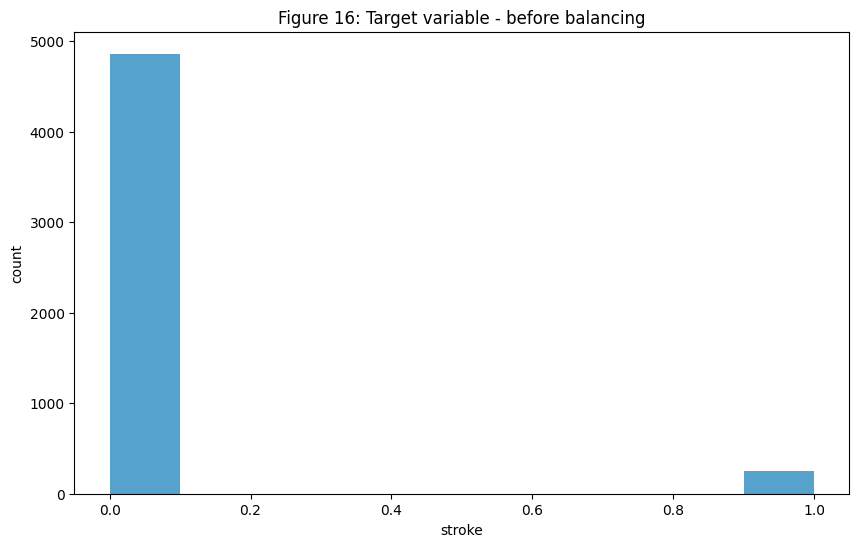

In [87]:
#view imbalance of target variable

# summarize class distribution
print(Counter(y))

#plt histogram of distribution
plt.figure(figsize=(10,6))
plt.hist(y)
plt.xlabel('stroke')
plt.ylabel('count')
fig_num +=1
plt.title(f"Figure {fig_num}: Target variable - before balancing")
plt.show()

Counter({1: 4861, 0: 4861})


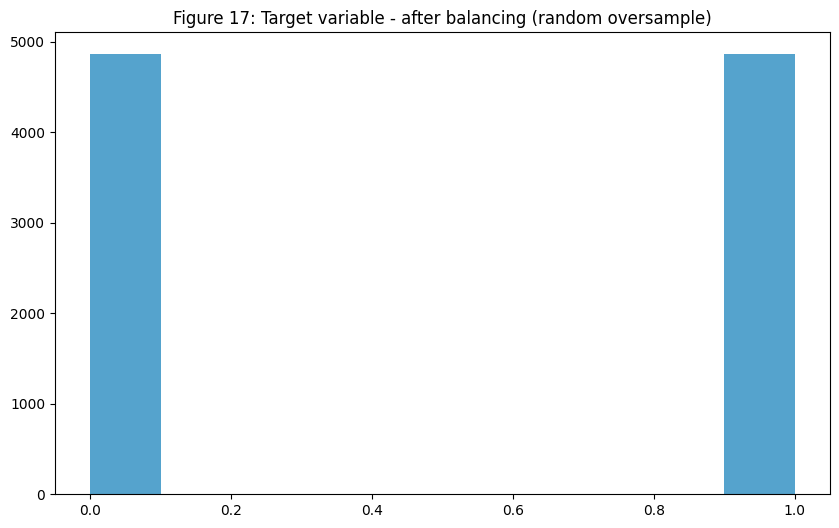

In [88]:
#Random oversampling
random_os = RandomOverSampler(random_state=42)
X_random_os, y_random_os = random_os.fit_resample(X, y)

# summarize class distribution
print(Counter(y_random_os))

#view data distribution after oversampling
plt.figure(figsize=(10,6))
plt.hist(y_random_os)
fig_num +=1
plt.title(f"Figure {fig_num}: Target variable - after balancing (random oversample)")
plt.show()

Train_test_split

In [89]:
# split information into dependent independent (X, y)
X = X_random_os #define X
y =  y_random_os #define y

In [90]:
#Train and test split:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [91]:
#check shape of train and test to ensure there are no issues
X_train.shape, X_test.shape, y_train.shape, y_test.shape #check shapes to ensure there wont be problems

((7291, 21), (2431, 21), (7291,), (2431,))

Feature Scaling

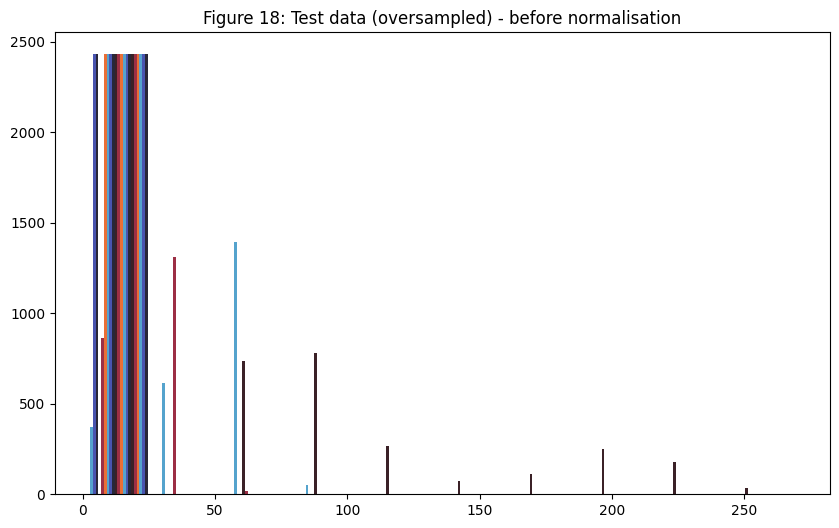

In [92]:
#examine before standardize information
plt.figure(figsize=(10,6))
plt.hist(X_test)
fig_num +=1
plt.title(f"Figure {fig_num}: Test data (oversampled) - before normalisation")
plt.show()



In [93]:
standard_scaler = StandardScaler() #model
X_train = standard_scaler.fit_transform(X_train)
X_test= standard_scaler.fit_transform(X_test)

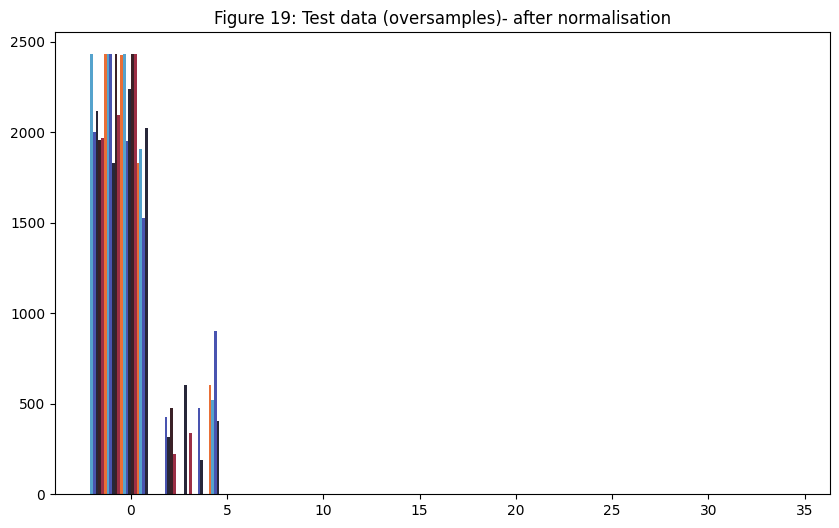

In [94]:
#examine before standardize information
plt.figure(figsize=(10,6))
plt.hist(X_test)
fig_num +=1
plt.title(f"Figure {fig_num}: Test data (oversamples)- after normalisation")
plt.show()

In [95]:
#create empty lists to store metrics of each model 
model_names = []
accuracy_scores = []
precision_scores = []
recall_scores= []
f1_scores = []

In [96]:
def run_and_evaluate_model(model, model_name):
    """
    This function runs and evaluates a defined model.
    When the function is called:
        - features and target variable are fit to the model
        - predictions are collected
        - empty lists are created for each metric (accuracy score, precision score, recall score, f1 score)
    
        Next, the following are collected, and appended to their respective list:
            - accuracy score
            - precision score
            - recall score
            - f1 score
            
        Next, the following are produced and displayed:
            - classification report 
            - confusion matrix
   """
    
    #global variable
    global fig_num #figure number to be used for created visuals (confusion matrices and graphs)
    
    #append model name to model_name list (to be used when creating a dataframe)
    model_names.append(model_name)
    
    #fit model and collect predictions
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    #print model name and information
    print(f"{model_name}")

    #get accuracy score and append accuracy score list
    acc_score = round(metrics.accuracy_score(y_test, y_pred), 3)
    accuracy_scores.append(acc_score)

    #get precision score and append precision score list
    prec_score = round(metrics.precision_score(y_test, y_pred), 3)
    precision_scores.append(prec_score)

    #get recall score and append recall score list
    rec_score = round(metrics.recall_score(y_test, y_pred), 3)
    recall_scores.append(rec_score)

    #get f1 score and append f1 score list
    f1_score = round(metrics.f1_score(y_test, y_pred), 3)
    f1_scores.append(f1_score)

    #classification report
    default_guess_unseen =model.predict(X_test)
    default_known_unseen = y_test
    print("Classification Report: \n\n", 
          classification_report(default_known_unseen, 
                                default_guess_unseen,
                                target_names=["Settles", "Defaults"]))

    #confusion matrix
    predictions = model.predict(X_test)
    cm = confusion_matrix(y_test, 
                          predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels = [False, True])
    fig_num +=1
    disp.plot()
    plt.title(f"Figure {fig_num}: Confusion Matrix\n{model_name}")

In [97]:
(len(y_test))**0.5

49.3051721424842

In [99]:
import numpy as np

print(np.isnan(X_train).sum())  # Count NaN values in the dataset
print(np.isnan(X_test).sum())


720
241


In [100]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")  # Change to "median" if needed
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [101]:
#K=45
knn = KNeighborsClassifier(n_neighbors=45)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)


print(f"F1 socre: {round(metrics.f1_score(y_test, pred), 3)}")
print(f"Accuracy socre: {round(metrics.accuracy_score(y_test, pred), 3)}")
print('\n')

print('WITH K=45')
print('\n')
print(f"Confusion Matrix:\n{confusion_matrix(y_test,pred)}")
print('\n')
print(f"Classification Report:\n{classification_report(y_test,pred)}")

F1 socre: 0.78
Accuracy socre: 0.764


WITH K=45


Confusion Matrix:
[[ 842  378]
 [ 195 1016]]


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.69      0.75      1220
           1       0.73      0.84      0.78      1211

    accuracy                           0.76      2431
   macro avg       0.77      0.76      0.76      2431
weighted avg       0.77      0.76      0.76      2431



In [102]:
error_rate = [] #empty list to store error rates of each model 

for i in range(1, 62, 2):
    knn = KNeighborsClassifier(n_neighbors=i) #defining the model
    knn.fit(X_train,y_train) #fitting the model to the training data
    pred_i = knn.predict(X_test) #running the model
    error_rate.append(np.mean(pred_i != y_test)) #appending the error_rate list with the error of each model

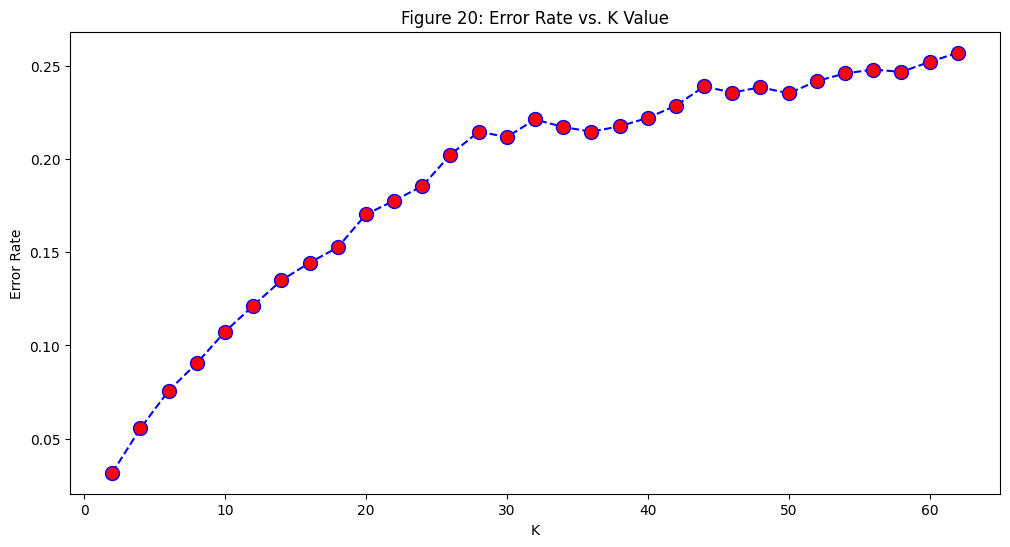

In [103]:
#plot error rates of the KNN model with K values ranging from 1 to 60

plt.figure(figsize=(12,6))

plt.plot(
    range(2, 64, 2),
    error_rate,
    color='blue', 
    linestyle='dashed', 
    marker='o',
    markerfacecolor='red', 
    markersize=10
)

fig_num +=1
plt.title(f'Figure {fig_num}: Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

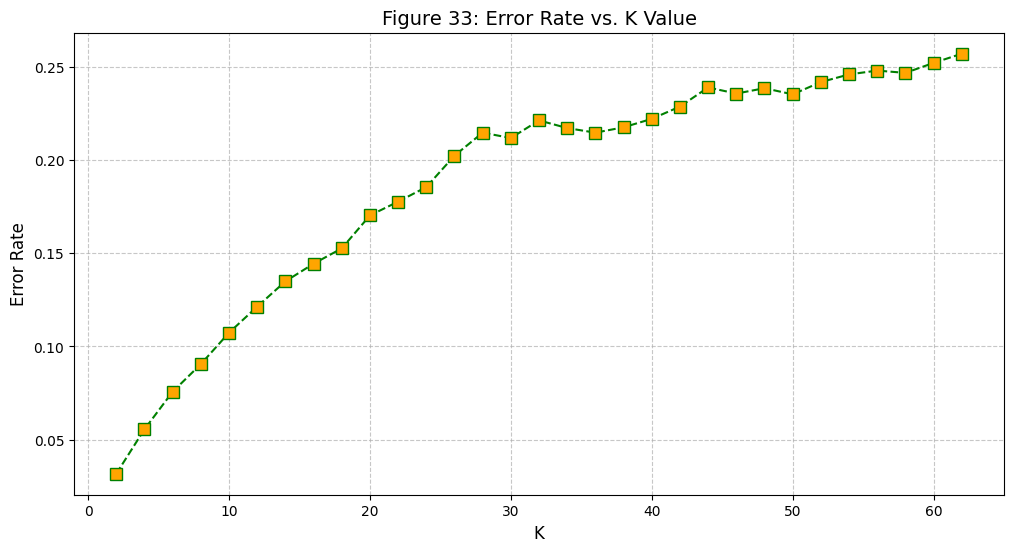

In [165]:
plt.figure(figsize=(12,6))

plt.plot(
    range(2, 64, 2),
    error_rate,
    color='green', 
    linestyle='dashed', 
    marker='s',  # Square markers
    markerfacecolor='orange', 
    markersize=8
)

fig_num += 1
plt.title(f'Figure {fig_num}: Error Rate vs. K Value', fontsize=14)
plt.xlabel('K', fontsize=12)
plt.ylabel('Error Rate', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)  # Light grid for readability
plt.show()


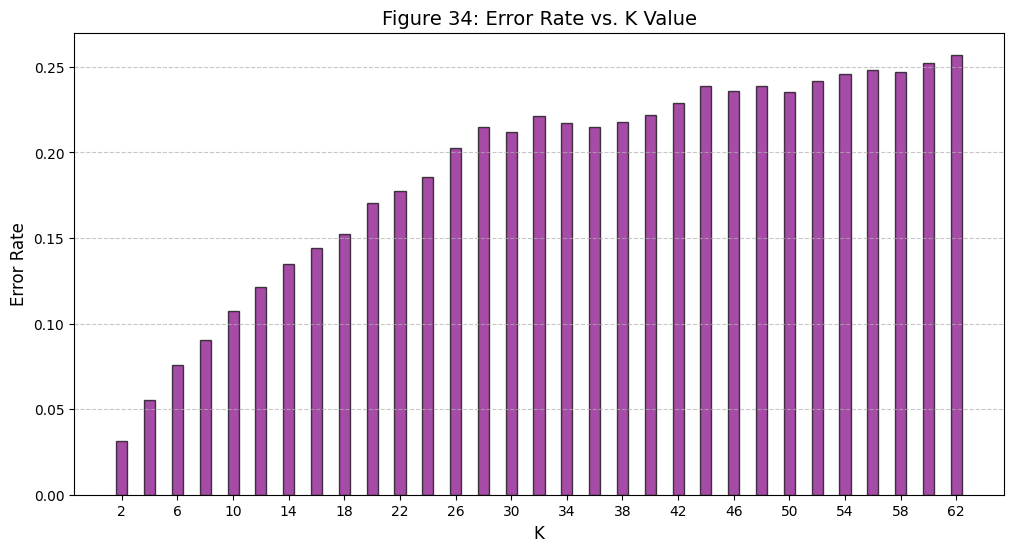

In [166]:
plt.figure(figsize=(12,6))

plt.bar(
    range(2, 64, 2), 
    error_rate, 
    color='purple', 
    edgecolor='black', 
    alpha=0.7
)

fig_num += 1
plt.title(f'Figure {fig_num}: Error Rate vs. K Value', fontsize=14)
plt.xlabel('K', fontsize=12)
plt.ylabel('Error Rate', fontsize=12)
plt.xticks(range(2, 64, 4))  # Show every 4th tick for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Grid only on Y-axis
plt.show()


In [104]:
(range(1, 62, 2))[0], error_rate[0] #error rate at k=1

(1, np.float64(0.03167420814479638))

K-Nearest Neighbours Classifier
Classification Report: 

               precision    recall  f1-score   support

     Settles       0.77      0.70      0.73      1220
    Defaults       0.72      0.79      0.75      1211

    accuracy                           0.74      2431
   macro avg       0.75      0.74      0.74      2431
weighted avg       0.75      0.74      0.74      2431



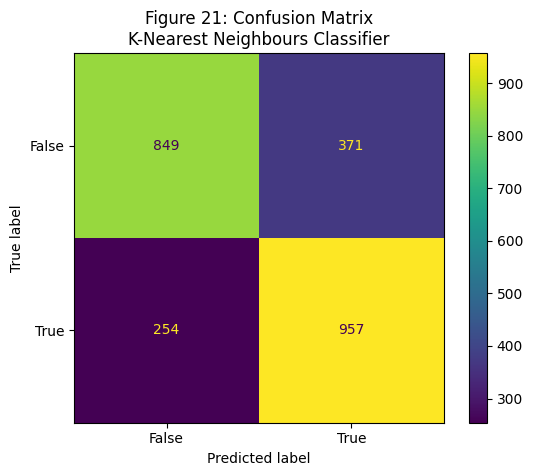

In [105]:
run_and_evaluate_model(knn, 'K-Nearest Neighbours Classifier')

Random Forest

In [106]:
#random forest model with default parameter values and a random state of 42
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
pred = rf.predict(X_test)

print(f"F1 socre: {round(metrics.f1_score(y_test, pred), 3)}")
print(f"Accuracy socre: {round(metrics.accuracy_score(y_test, pred), 3)}")
print('\n')
print(f"Confusion Matrix:\n{confusion_matrix(y_test,pred)}")
print('\n')
print(f"Classification Report:\n{classification_report(y_test,pred)}")

F1 socre: 0.991
Accuracy socre: 0.991


Confusion Matrix:
[[1197   23]
 [   0 1211]]


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1220
           1       0.98      1.00      0.99      1211

    accuracy                           0.99      2431
   macro avg       0.99      0.99      0.99      2431
weighted avg       0.99      0.99      0.99      2431



In [107]:
#define hyperparameter search space
param_grid_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'n_jobs': [None, -1]
}

#create a RandomForestClassifier obpject
rf = RandomForestClassifier(random_state=42)

#create a GridSearchCV object
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5)

#Fit the GridSearchCV object to the data
grid_rf.fit(X_train, y_train)

#print the best hyperparameters
print("Best parameters: ", grid_rf.best_params_)
print("Best score: ", grid_rf.best_score_)

Best parameters:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200, 'n_jobs': None}
Best score:  0.9854615080137382


In [170]:
#random forest model with best parameter values and a random state of 42
rf = RandomForestClassifier(
    random_state=42,
    n_estimators=50, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    max_features='sqrt', 
    max_depth=None, 
    n_jobs=None
)

rf.fit(X_train,y_train)
pred = rf.predict(X_test)



print(f"Confusion Matrix:\n{confusion_matrix(y_test,pred)}")



Confusion Matrix:
[[1197   23]
 [   0 1211]]


Random Forest Classifier
Classification Report: 

               precision    recall  f1-score   support

     Settles       1.00      0.98      0.99      1220
    Defaults       0.98      1.00      0.99      1211

    accuracy                           0.99      2431
   macro avg       0.99      0.99      0.99      2431
weighted avg       0.99      0.99      0.99      2431



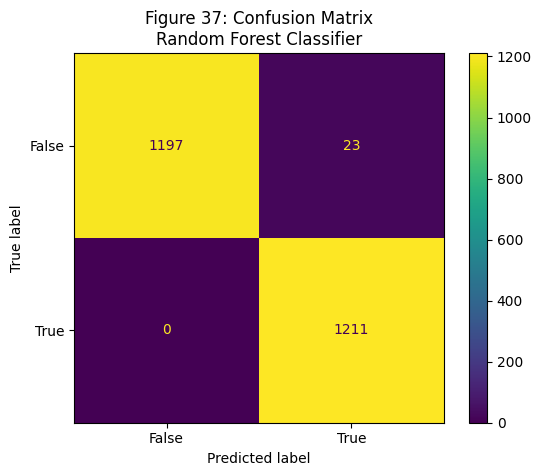

In [171]:
rf = RandomForestClassifier(random_state=42)
run_and_evaluate_model(rf, 'Random Forest Classifier')

Decision Tree Classifier

In [111]:
#decision tree classification model
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train,y_train)
pred = dtree.predict(X_test)

print(f"F1 socre: {round(metrics.f1_score(y_test, pred), 3)}")
print(f"Accuracy socre: {round(metrics.accuracy_score(y_test, pred), 3)}")
print('\n')
print(f"Confusion Matrix:\n{confusion_matrix(y_test,pred)}")
print('\n')
print(f"Classification Report:\n{classification_report(y_test,pred)}")

F1 socre: 0.937
Accuracy socre: 0.938


Confusion Matrix:
[[1163   57]
 [  93 1118]]


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1220
           1       0.95      0.92      0.94      1211

    accuracy                           0.94      2431
   macro avg       0.94      0.94      0.94      2431
weighted avg       0.94      0.94      0.94      2431



In [112]:
#define hyperparameter search space
param_grid_dtree = {
    'max_depth': [None, 2, 4, 6, 8, 10], 
    'min_samples_leaf': [1, 2, 4, 8, 10, 12], 
    'min_samples_split': [2, 4, 6, 8, 10, 12],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_leaf_nodes': [None, 4, 12, 20, 30]
}

#create a DecisionTreeClassifier object
dtree = DecisionTreeClassifier(random_state=42)

#create a GridSearchCV object
grid_dtree = GridSearchCV(dtree, param_grid_dtree, cv=5)

#fit the GridSearchCV object to the data
grid_dtree.fit(X_train, y_train)

#print the best hyperparameters
print("Best parameters: ", grid_dtree.best_params_)
print("Best score: ", grid_dtree.best_score_)

Best parameters:  {'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 8}
Best score:  0.9670816680158442


In [125]:
#decision tree model with best parameter values and a random state of 42
dtree = DecisionTreeClassifier(
    random_state=42,
    max_depth=None, 
    min_samples_leaf=8, 
    min_samples_split=2, 
    max_features=None, 
    max_leaf_nodes=None)

dtree.fit(X_train,y_train)
pred = dtree.predict(X_test)

print(f"F1 socre: {round(metrics.f1_score(y_test, pred), 3)}")
print(f"Accuracy socre: {round(metrics.accuracy_score(y_test, pred), 3)}")
print('\n')
print(f"Confusion Matrix:\n{confusion_matrix(y_test,pred)}")
print('\n')
print(f"Classification Report:\n{classification_report(y_test,pred)}")

F1 socre: 0.917
Accuracy socre: 0.915


Confusion Matrix:
[[1089  131]
 [  75 1136]]


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      1220
           1       0.90      0.94      0.92      1211

    accuracy                           0.92      2431
   macro avg       0.92      0.92      0.92      2431
weighted avg       0.92      0.92      0.92      2431



Decision Tree Classifier
Classification Report: 

               precision    recall  f1-score   support

     Settles       0.94      0.89      0.91      1220
    Defaults       0.90      0.94      0.92      1211

    accuracy                           0.92      2431
   macro avg       0.92      0.92      0.92      2431
weighted avg       0.92      0.92      0.92      2431



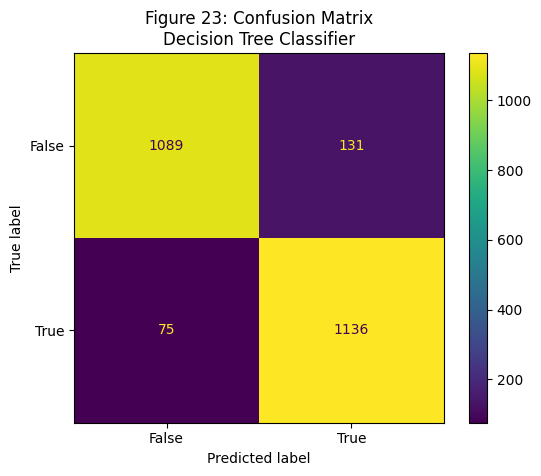

In [114]:
dtree = DecisionTreeClassifier(
    random_state=42,
    max_depth=None, 
    min_samples_leaf=8, 
    min_samples_split=2, 
    max_features=None, 
    max_leaf_nodes=None)

run_and_evaluate_model(dtree, 'Decision Tree Classifier')

SVM

In [115]:
#support vector machine (SVM) classification model
svm = SVC(random_state=42)
svm.fit(X_train,y_train)
pred = svm.predict(X_test)

print(f"F1 socre: {round(metrics.f1_score(y_test, pred), 3)}")
print(f"Accuracy socre: {round(metrics.accuracy_score(y_test, pred), 3)}")
print('\n')
print(f"Confusion Matrix:\n{confusion_matrix(y_test,pred)}")
print('\n')
print(f"Classification Report:\n{classification_report(y_test,pred)}")

F1 socre: 0.854
Accuracy socre: 0.844


Confusion Matrix:
[[ 942  278]
 [ 102 1109]]


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1220
           1       0.80      0.92      0.85      1211

    accuracy                           0.84      2431
   macro avg       0.85      0.84      0.84      2431
weighted avg       0.85      0.84      0.84      2431



In [116]:
#define hyperparameter search space
param_grid_svm = {
    'kernel': ['linear', 'rbf'], #, 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'C': [0.1, 1, 10],
#     'probability': [True, False]
}

#create a RandomForestClassifier object
svm = SVC(random_state=42)

#create a GridSearchCV object
grid_svm = GridSearchCV(svm, param_grid_svm, cv=5)

#Fit the GridSearchCV object to the data
grid_svm.fit(X_train, y_train)

#print the best hyperparameters
print("Best parameters: ", grid_svm.best_params_)
print("Best score: ", grid_svm.best_score_)

Best parameters:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best score:  0.8784799141791501


In [117]:
#SVM model with best parameter values and a random state of 42
svm = SVC(
    random_state=42,
    kernel= 'rbf',
    gamma= 'scale',
    C=10
)

svm.fit(X_train,y_train)
pred = svm.predict(X_test)

print(f"F1 socre: {round(metrics.f1_score(y_test, pred), 3)}")
print(f"Accuracy socre: {round(metrics.accuracy_score(y_test, pred), 3)}")
print('\n')
print(f"Confusion Matrix:\n{confusion_matrix(y_test,pred)}")
print('\n')
print(f"Classification Report:\n{classification_report(y_test,pred)}")

F1 socre: 0.895
Accuracy socre: 0.888


Confusion Matrix:
[[ 994  226]
 [  46 1165]]


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.81      0.88      1220
           1       0.84      0.96      0.90      1211

    accuracy                           0.89      2431
   macro avg       0.90      0.89      0.89      2431
weighted avg       0.90      0.89      0.89      2431



Support Vector Machine Classifier
Classification Report: 

               precision    recall  f1-score   support

     Settles       0.96      0.81      0.88      1220
    Defaults       0.84      0.96      0.90      1211

    accuracy                           0.89      2431
   macro avg       0.90      0.89      0.89      2431
weighted avg       0.90      0.89      0.89      2431



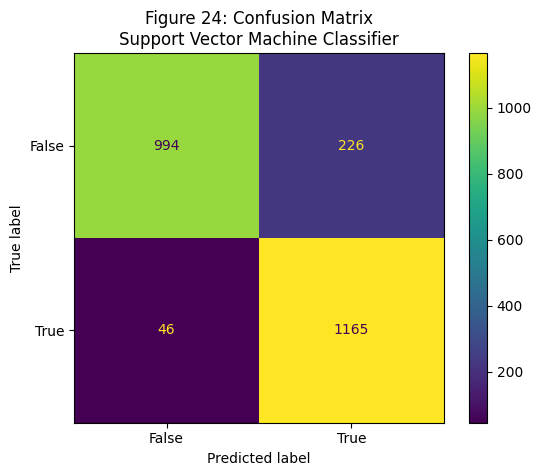

In [118]:
svm = SVC(
    random_state=42,
    kernel= 'rbf',
    gamma= 'scale',
    C=10
)

run_and_evaluate_model(svm, 'Support Vector Machine Classifier')

Logistic Regression

In [119]:
#logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train,y_train)
pred = log_reg.predict(X_test)

print(f"F1 socre: {round(metrics.f1_score(y_test, pred), 3)}")
print(f"Accuracy socre: {round(metrics.accuracy_score(y_test, pred), 3)}")
print('\n')
print(f"Confusion Matrix:\n{confusion_matrix(y_test,pred)}")
print('\n')
print(f"Classification Report:\n{classification_report(y_test,pred)}")

F1 socre: 0.793
Accuracy socre: 0.786


Confusion Matrix:
[[913 307]
 [213 998]]


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.75      0.78      1220
           1       0.76      0.82      0.79      1211

    accuracy                           0.79      2431
   macro avg       0.79      0.79      0.79      2431
weighted avg       0.79      0.79      0.79      2431



In [120]:
#define hyperparameter search space
param_grid_log_reg = {
    'solver': ['lbfgs', 'newton-cholesky'],
    'n_jobs': [None, -1],
    'C': [0.1, 1, 10],
    'max_iter': [100, 500, 1000],
    'multi_class': ['auto', 'ovr','multinominal']
}

#create a LogisticRegression object
log_reg = LogisticRegression(random_state=42)

#create a GridSearchCV object
grid_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5)

#Fit the GridSearchCV object to the data
grid_log_reg.fit(X_train, y_train)

#print the best hyperparameters
print("Best parameters: ", grid_log_reg.best_params_)
print("Best score: ", grid_log_reg.best_score_)

Best parameters:  {'C': 0.1, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'solver': 'lbfgs'}
Best score:  0.7749268294517451


In [121]:
#Logistic regression with best parameter values and a random state of 42
log_reg = LogisticRegression(
    random_state=42,
    solver='lbfgs',
    n_jobs=None,
    C=0.1,
    max_iter=100,
    multi_class='auto'
)

log_reg.fit(X_train,y_train)
pred = log_reg.predict(X_test)

print(f"F1 socre: {round(metrics.f1_score(y_test, pred), 3)}")
print(f"Accuracy socre: {round(metrics.accuracy_score(y_test, pred), 3)}")
print('\n')
print(f"Confusion Matrix:\n{confusion_matrix(y_test,pred)}")
print('\n')
print(f"Classification Report:\n{classification_report(y_test,pred)}")

F1 socre: 0.797
Accuracy socre: 0.789


Confusion Matrix:
[[ 911  309]
 [ 205 1006]]


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.75      0.78      1220
           1       0.77      0.83      0.80      1211

    accuracy                           0.79      2431
   macro avg       0.79      0.79      0.79      2431
weighted avg       0.79      0.79      0.79      2431



Logistic Regression
Classification Report: 

               precision    recall  f1-score   support

     Settles       0.81      0.75      0.78      1220
    Defaults       0.76      0.82      0.79      1211

    accuracy                           0.79      2431
   macro avg       0.79      0.79      0.79      2431
weighted avg       0.79      0.79      0.79      2431



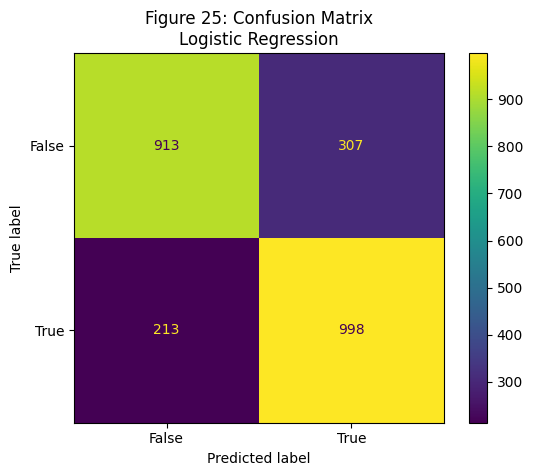

In [122]:
log_reg = LogisticRegression(random_state=42)
run_and_evaluate_model(log_reg, 'Logistic Regression')

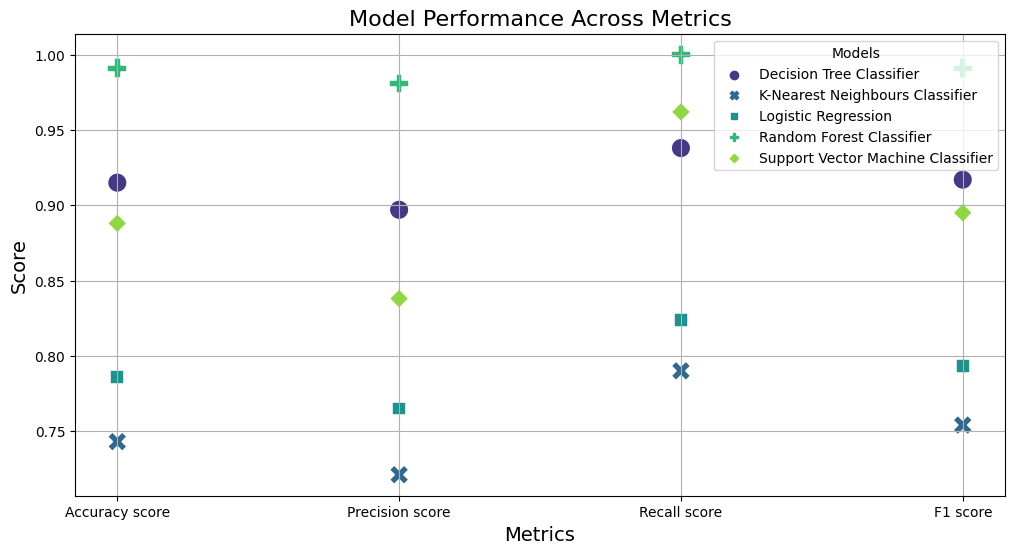

In [132]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.scatterplot(data=grouped_data_T, markers=True, palette="viridis", s=200)
plt.title("Model Performance Across Metrics", fontsize=16)
plt.xlabel("Metrics", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.grid(True)
plt.legend(title="Models")
plt.show()


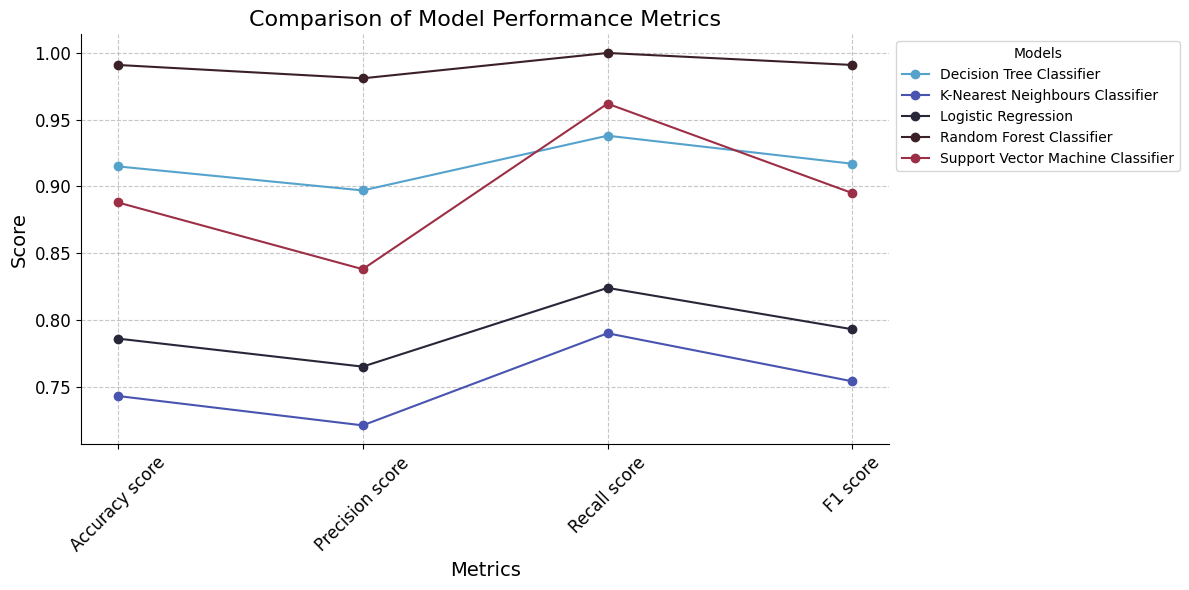

In [135]:
import matplotlib.pyplot as plt

# Transpose the dataframe for better plotting
grouped_data_T = grouped_data.T

# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot each model as a line
for model in grouped_data_T.columns:
    ax.plot(grouped_data_T.index, grouped_data_T[model], marker='o', label=model)

# Labels and title
ax.set_xlabel('Metrics', fontsize=14)
ax.set_ylabel('Score', fontsize=14)
ax.set_title('Comparison of Model Performance Metrics', fontsize=16)

# Move the legend outside the graph
ax.legend(title='Models', loc='upper left', bbox_to_anchor=(1, 1))

# Remove the top and right spines to declutter
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust tick labels
ax.tick_params(axis='x', labelsize=12, rotation=45)
ax.tick_params(axis='y', labelsize=12)

# Show grid with dashed lines
ax.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()
